#Progetto: Lancio Moneta

Simuliamo il lancio di una moneta diverse volte!

Includiamo i pacchetti che ci interessano

In [ ]:
import random
import matplotlib.pyplot as plt

Scegliamo il numero di lanci e simuliamo, mostrando il grafico dei risultati

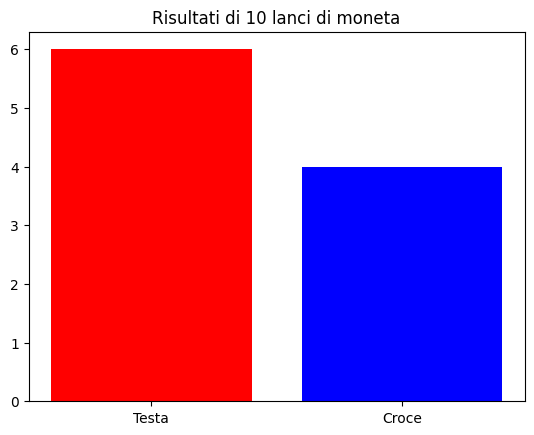

In [ ]:
lanci = 10 #numero di lanci
testa = 0 #counter numero di teste

#simulazione
for lancio in range(lanci):
    risultato = random.choice(["testa", "croce"])
    if risultato == "testa":
        testa += 1

#numero di croci
croce = lanci - testa

#creiamo il grafico a barre dei risultati
plt.bar(["Testa", "Croce"], [testa, croce], color=['red', 'blue'])
plt.title(f"Risultati di {lanci} lanci di moneta")
plt.show()

#Progetto: lancio dei dadi

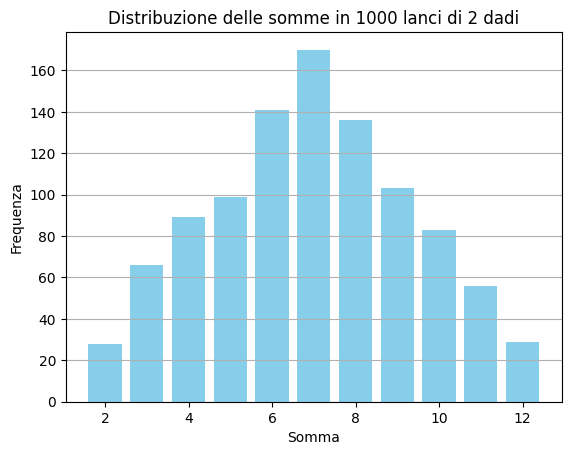

In [ ]:
import random
import matplotlib.pyplot as plt

# Numero di simulazioni
lanci = 1000

# Inizializziamo una lista per contare le somme (da 2 a 12)
conteggi = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#            0  1  2  3  4  5  6  7  8  9 10 11 12
  # Indici 0 e 1 non li useremo

# Simuliamo i lanci
for _ in range(lanci):
    dado1 = random.randint(1, 6)
    dado2 = random.randint(1, 6)
    somma = dado1 + dado2
    conteggi[somma] += 1

# Creiamo liste per l’asse X e Y del grafico
somme = list(range(2, 13))         # [2, 3, ..., 12]
frequenze = conteggi[2:13]         # Ignoriamo i primi due valori

# Visualizziamo il risultato
plt.bar(somme, frequenze, color='skyblue')
plt.title("Distribuzione delle somme in 1000 lanci di 2 dadi")
plt.xlabel("Somma")
plt.ylabel("Frequenza")
plt.grid(axis='y')
plt.show()


In [ ]:
#Prova a estendere il codice al lancio di 3 dadi e discuti il risultato

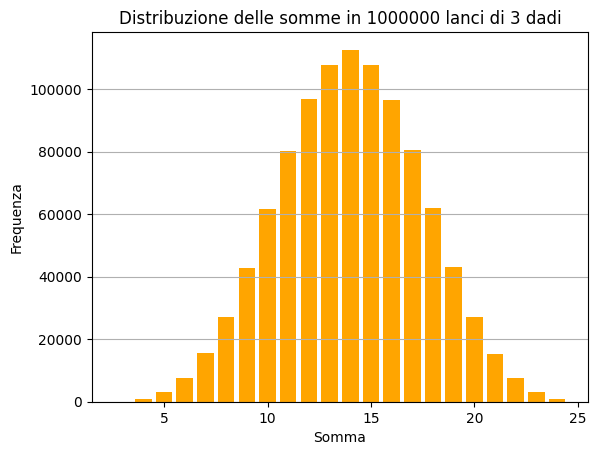

In [ ]:
import random
import matplotlib.pyplot as plt

# Numero di simulazioni
lanci = 1000000

# Possibili somme con 3 dadi: da 3 a 18
conteggi = [0] * 25  # Indici da 0 a 18 (useremo da 3 in su)

# Simulazione
for _ in range(lanci):
    somma = sum(random.randint(1, 6) for _ in range(4))
    conteggi[somma] += 1

# Dati per il grafico
somme = list(range(3, 25))
frequenze = conteggi[3:25]

# Grafico
plt.bar(somme, frequenze, color='orange')
plt.title(f"Distribuzione delle somme in {lanci} lanci di 3 dadi")
plt.xlabel("Somma")
plt.ylabel("Frequenza")
plt.grid(axis='y')
plt.show()


##Risultati avanzati: la funzione Gaussiana

In [ ]:
import random
import matplotlib.pyplot as plt

# Simulate 1000 rolls of two dice
lanci = 100
conteggi = [0]*13  # sums from 2 to 12

for _ in range(lanci):
    somma = random.randint(1, 6) + random.randint(1, 6)
    conteggi[somma] += 1

somme = list(range(2, 13))       # x-axis: 2 to 12
frequenze = conteggi[2:13]       # counts for 2–12

Creiamo il grafico di una Gaussiana

In [ ]:
import numpy as np
import math

# Mean and standard deviation for two dice
mu = 7
sigma = math.sqrt(35/6)
# Generate x values for Gaussian curve
x = np.linspace(2, 12, 1000)
# Compute Gaussian values scaled to match the histogram height
gaussian = [lanci * (1 / (sigma * math.sqrt(2 * math.pi))) *
            math.exp(-((xi - mu)**2) / (2 * sigma**2)) for xi in x]

Sovrapponiamo i risultati con una Gaussiana

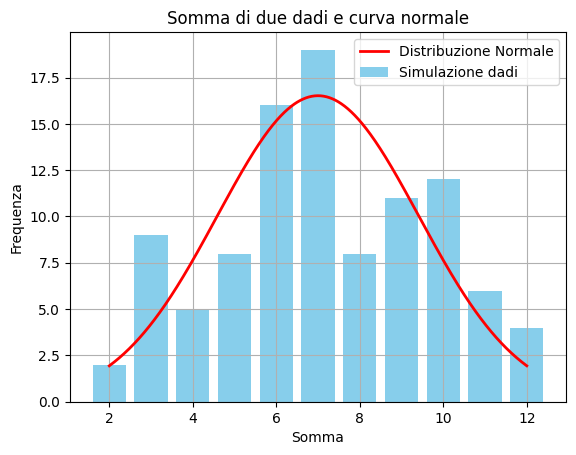

In [ ]:
plt.bar(somme, frequenze, color='skyblue', label="Simulazione dadi")
plt.plot(x, gaussian, color='red', linewidth=2, label="Distribuzione Normale")
plt.title("Somma di due dadi e curva normale")
plt.xlabel("Somma")
plt.ylabel("Frequenza")
plt.legend()
plt.grid(True)
plt.show()

#Progetto:  Il gioco del bersaglio probabilistico

In [ ]:
import random
import matplotlib.pyplot as plt

#numero di lanci
n = 100
#counter punti interni
dentro = 0

#registriamo le coordinate dei punti
x_in, y_in = [], []
x_out, y_out = [], []

for _ in range(n):
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)
    if x**2 + y**2 <= 1: #teorema di pitagora
        dentro += 1
        x_in.append(x)
        y_in.append(y)
    else:
        x_out.append(x)
        y_out.append(y)

Percentuale di punti che hanno centrato il bersaglio: 0.79


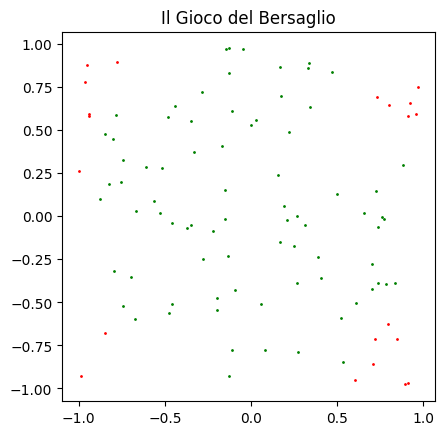

In [ ]:
percentuale = dentro / n
print(f"Percentuale di punti che hanno centrato il bersaglio: {percentuale}")

plt.scatter(x_in, y_in, color='green', s=1)
plt.scatter(x_out, y_out, color='red', s=1)
plt.gca().set_aspect('equal')
plt.title("Il Gioco del Bersaglio")
plt.show()

Proviamo a moltiplicare la percentuale ottenuta per quattro.

In [ ]:
print(percentuale*4)

3.16


Che risultato abbiamo ottenuto? Perchè?

#Progetto: Analisi dei testi

Importiamo i pacchetti necessari alla nostra analisi, come wordcloud

In [ ]:
import wordcloud
import matplotlib.pyplot as plt

Scegliamo il testo che vogliamo analizzare

In [ ]:
testo = """
Taci. Su le soglie
del bosco non odo parole che dici umane; ma odo parole più nuove che parlano gocciole e foglie lontane. Ascolta. Piove dalle nuvole sparse. Piove su le tamerici salmastre ed arse, piove su i pini scagliosi ed irti, piove su i mirti divini, su le ginestre fulgenti di fiori accolti, su i ginepri folti di coccole aulenti, piove su i nostri volti silvani, piove su le nostre mani ignude, su i nostri vestimenti leggieri, su i freschi pensieri che l'anima schiude novella, su la favola bella che ieri t'illuse, che oggi m'illude, o Ermione.

Odi? La pioggia cade su la solitaria verdura con un crepitìo che dura e varia nell'aria secondo le fronde più rade, men rade. Ascolta. Risponde al pianto il canto delle cicale che il pianto australe non impaura, né il ciel cinerino. E il pino ha un suono, e il mirto altro suono, e il ginepro altro ancóra, stromenti diversi sotto innumerevoli dita. E immersi noi siam nello spirto silvestre, d'arborea vita viventi; e il tuo volto ebro è molle di pioggia come una foglia, e le tue chiome auliscono come le chiare ginestre, o creatura terrestre che hai nome Ermione.

Ascolta, ascolta. L'accordo delle aeree cicale a poco a poco più sordo si fa sotto il pianto che cresce; ma un canto vi si mesce più roco che di laggiù sale, dall'umida ombra remota. Più sordo e più fioco s'allenta, si spegne. Sola una nota ancor trema, si spegne, risorge, trema, si spegne. Non s'ode voce del mare. Or s'ode su tutta la fronda crosciare l'argentea pioggia che monda, il croscio che varia secondo la fronda più folta, men folta. Ascolta. La figlia dell'aria è muta; ma la figlia del limo lontana, la rana, canta nell'ombra più fonda, chi sa dove, chi sa dove! E piove su le tue ciglia, Ermione.

Piove su le tue ciglia nere sì che par tu pianga ma di piacere; non bianca ma quasi fatta virente, par da scorza tu esca. E tutta la vita è in noi fresca aulente, il cuor nel petto è come pèsca intatta, tra le pàlpebre gli occhi son come polle tra l'erbe, i denti negli alvèoli son come mandorle acerbe. E andiam di fratta in fratta, or congiunti or disciolti (e il verde vigor rude ci allaccia i mallèoli, c'intrica i ginocchi) chi sa dove, chi sa dove! E piove su i nostri volti silvani, piove su le nostre mani ignude, su i nostri vestimenti leggieri, su i freschi pensieri che l'anima schiude novella, su la favola bella che ieri m'illuse, che oggi t'illude, o Ermione.
"""


Vogliamo "pulire" il nostro testo, partiamo mettendo tutte le lettere minuscole con il comando .lower()

In [ ]:
testo_pulito = testo.lower()

Importiamo il pacchetto string

In [ ]:
import string

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Eliminiamo la punteggiatura

In [ ]:
for carattere in string.punctuation:
    testo_pulito = testo_pulito.replace(carattere, "")

print(testo_pulito)


taci su le soglie
del bosco non odo parole che dici umane ma odo parole più nuove che parlano gocciole e foglie lontane ascolta piove dalle nuvole sparse piove su le tamerici salmastre ed arse piove su i pini scagliosi ed irti piove su i mirti divini su le ginestre fulgenti di fiori accolti su i ginepri folti di coccole aulenti piove su i nostri volti silvani piove su le nostre mani ignude su i nostri vestimenti leggieri su i freschi pensieri che lanima schiude novella su la favola bella che ieri tilluse che oggi millude o ermione

odi la pioggia cade su la solitaria verdura con un crepitìo che dura e varia nellaria secondo le fronde più rade men rade ascolta risponde al pianto il canto delle cicale che il pianto australe non impaura né il ciel cinerino e il pino ha un suono e il mirto altro suono e il ginepro altro ancóra stromenti diversi sotto innumerevoli dita e immersi noi siam nello spirto silvestre darborea vita viventi e il tuo volto ebro è molle di pioggia come una foglia e l

Vogliamo analizzare *quali parole vengono ripetute più volte per capire che influenza hanno nel testo*

La prima cosa da fare è eliminare le STOPWORDS: parole che non portano un significato intrinseco ma che sono presenti nel testo, come articoli, preposizioni, eccetera

In [ ]:
stopwords = ["che", "il", "e", "la", "ma", "su", "si", "i", "le", "di", "del"]

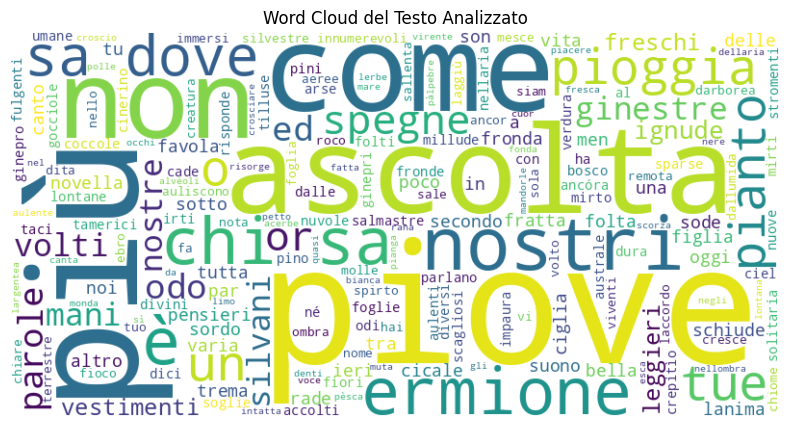

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords).generate(testo_pulito)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud del Testo Analizzato")
plt.show()
